In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('drive/MyDrive/rating.csv', usecols=['user_id','product_id','reviews.rating',])

df.head()

,user_id,product_id,reviews.rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   user_id         1048575 non-null  object
 1   product_id      1048575 non-null  object
 2   reviews.rating  1048575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [ ]:

counts1 = df['user_id'].value_counts()


Data_new = df[df['user_id'].isin(counts1[counts1 >= 50].index)]
print(Data_new)



                user_id  product_id  reviews.rating
2161      A5JLAU2ARJ0BO  1400532655               1
3049      ALUNVOQRXOZIA  1400599997               1
4613      A1VQHH85U7PX0  9043413585               3
6071     A250AXLRBVYKB4  998376234X               1
7380     A2AEZQ3DGBBLPR  B000000O48               5
...                 ...         ...             ...
1046376  A1ODOGXEYECQQ8  B000IDWDKO               5
1046506  A250AXLRBVYKB4  B000IE5XIC               5
1046631   AT6CZDCP4TRGA  B000IE8Z4Q               2
1047943   AWPODHOB4GFWL  B000IF4788               4
1048157  A2XRMQA6PJ5ZJ8  B000IF4788               4

[3456 rows x 3 columns]


In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 8.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617537 sha256=695cac98f0f26bed2890db28b586114a9cf7c635c5bdd7faa48af155687e4d16
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict

In [ ]:
#Reading the dataset
reader = Reader(rating_scale=(1,5))
data1 = Dataset.load_from_df(Data_new,reader)

print(data1)


In [ ]:
trainset, testset = train_test_split(data1, test_size=0.3,random_state=123)

In [ ]:
trainset.ur

defaultdict(list,
            {0: [(0, 4.0),
              (30, 4.0),
              (85, 5.0),
              (102, 4.0),
              (134, 5.0),
              (136, 5.0),
              (157, 5.0),
              (201, 5.0),
              (208, 5.0),
              (238, 1.0),
              (246, 5.0),
              (48, 5.0),
              (275, 5.0),
              (322, 5.0),
              (342, 5.0),
              (352, 5.0),
              (369, 1.0),
              (457, 5.0),
              (505, 5.0),
              (545, 5.0),
              (744, 4.0),
              (816, 4.0),
              (907, 5.0),
              (909, 4.0),
              (921, 5.0),
              (931, 3.0),
              (933, 5.0),
              (992, 2.0),
              (1106, 4.0),
              (1181, 4.0),
              (1286, 5.0),
              (1328, 5.0),
              (1345, 5.0),
              (1366, 4.0),
              (536, 4.0),
              (1478, 5.0),
              (1530, 5.0),
              

In [ ]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [ ]:
test_pred


[Prediction(uid='A6FIAB28IS79', iid='B00004T1WU', r_ui=5.0, est=4.216205043406366, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A38QEATH3NODFM', iid='B0002J288G', r_ui=3.0, est=4.216205043406366, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1MJMYLRTZ76ZX', iid='B00065DGNC', r_ui=5.0, est=4.517857142857143, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A12DLJESJKM1OQ', iid='B0000DBJJT', r_ui=5.0, est=4.216205043406366, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ABH9D1TEOJ56E', iid='B0000C8627', r_ui=4.0, est=4.216205043406366, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B000117DGW', r_ui=4.0, est=4.216205043406366, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AGHZXQL9F94T9', iid='B0001A99MO', r_ui=5.

In [ ]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(test_pred, n=5)
top_n

defaultdict(list,
            {'A11D1KHM7DVOQK': [('B0001IXUEE', 4.216205043406366),
              ('B000BC8VV2', 4.216205043406366),
              ('B0007RB1X6', 4.216205043406366),
              ('B000084FD5', 4.216205043406366),
              ('B0007Y79AI', 4.216205043406366)],
             'A12DLJESJKM1OQ': [('B00006L9CT', 5),
              ('B00008OE6I', 5),
              ('B000A7B9XK', 4.288888888888889),
              ('B00006IIU1', 4.288888888888889),
              ('B000087BXC', 4.288888888888889)],
             'A1435P5AMCPB3X': [('B000087KY8', 4.431372549019608),
              ('B000FGEC6C', 4.216205043406366),
              ('B000FHFIU0', 4.216205043406366),
              ('B000H7ECKK', 4.216205043406366),
              ('B000HDMRNS', 4.216205043406366)],
             'A149RNR5RH19YY': [('B00002EQCS', 4.216205043406366),
              ('B0002UBDDG', 4.216205043406366),
              ('B00026CX6Q', 4.216205043406366),
              ('B000BH0X5O', 4.216205043406366),
        

In [ ]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A6FIAB28IS79 ['B000EOPQ7E', 'B00004T1WU', 'B0001YXWVO', 'B00000J05A', 'B00006B722']
A38QEATH3NODFM ['B000204SWE', 'B00000JF4L', 'B00004TWM3', 'B00008L3HI', 'B0001H4BMU']
A1MJMYLRTZ76ZX ['B00065DGNC', 'B0009MZ9UA', 'B00004YZLV', 'B00005Y3V5', 'B000021YUO']
A12DLJESJKM1OQ ['B00006L9CT', 'B00008OE6I', 'B000A7B9XK', 'B00006IIU1', 'B000087BXC']
ABH9D1TEOJ56E ['B0000C8627', 'B00005UKXM', 'B0000DKHIP', 'B000063LHM', 'B000087BX8']
A5JLAU2ARJ0BO ['B000087L74', 'B000117DGW', 'B000087KY5', 'B0007KQWF0', 'B0000AN42F']
AGHZXQL9F94T9 ['B00009VSG6', 'B0002ZAIOG', 'B00017IX10', 'B0000A602S', 'B0002ZAIM8']
A680RUE1FDO8B ['B000FJ89UO', 'B00007EDM8', 'B000E5CYW8', 'B000AM6QH4', 'B0006UMGHE']
A2CL818RN52NWN ['B0002HVIBG', 'B0000EWNWE', 'B000ACAWZ6', 'B0000E6S0Y', 'B0001LXQIQ']
AKT8TGIT6VVZ5 ['B000BY52NK', 'B00009XVBU', 'B000021YU8', 'B000EW9Y4M', 'B0007WK8KS']
A3OXHLG6DIBRW8 ['B000F7QRTG', 'B000EVM5DK', 'B00009VSBE', 'B000067VBL', 'B0007XGOW8']
A1F9Z42CFF9IAY ['B000BJSEQW', 'B00030CHRQ', 'B00062UKIY', 'B0

In [ ]:
uid = "A2CL818RN52NWN" 
iid = "1400501474"


pred = algo.predict(uid, iid, r_ui=3, verbose=True)

user: A2CL818RN52NWN item: 1400501474 r_ui = 3.00   est = 4.22   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


In [ ]:
pred = pd.DataFrame(test_pred)
pred[pred['uid'] == "A2CL818RN52NWN"][['iid', 'r_ui','est']].sort_values(by = 'est',ascending = False)

,iid,r_ui,est
8,B0002HVIBG,5.0,4.522727
117,B0000EWNWE,4.0,4.522727
354,B000ACAWZ6,1.0,4.522727
512,B0002LHSG6,5.0,4.216205
973,B0000511WW,5.0,4.216205
952,B00018WNSI,4.0,4.216205
821,B0009O5MUA,3.0,4.216205
805,B0002MIEXG,5.0,4.216205
769,B00007G9J5,5.0,4.216205
734,B0006688XO,4.0,4.216205


In [ ]:
pred

,uid,iid,r_ui,est,details
0,A6FIAB28IS79,B00004T1WU,5.0,4.216205,"{'was_impossible': True, 'reason': 'User and/o..."
1,A38QEATH3NODFM,B0002J288G,3.0,4.216205,"{'was_impossible': True, 'reason': 'User and/o..."
2,A1MJMYLRTZ76ZX,B00065DGNC,5.0,4.517857,"{'actual_k': 0, 'was_impossible': False}"
3,A12DLJESJKM1OQ,B0000DBJJT,5.0,4.216205,"{'was_impossible': True, 'reason': 'User and/o..."
4,ABH9D1TEOJ56E,B0000C8627,4.0,4.216205,"{'was_impossible': True, 'reason': 'User and/o..."
...,...,...,...,...,...
1032,A1FR68QH6Z4YZM,B0000AE6C3,5.0,4.216205,"{'was_impossible': True, 'reason': 'User and/o..."
1033,A2XRMQA6PJ5ZJ8,B00006JK37,5.0,4.216205,"{'was_impossible': True, 'reason': 'User and/o..."
1034,A25HBO5V8S8SEA,B0000898TE,5.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
1035,AWPODHOB4GFWL,B000IF4788,4.0,4.523810,"{'actual_k': 0, 'was_impossible': False}"


In [ ]:
type(test_pred)

list

In [ ]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.1354


1.1354297272255423

In [ ]:
import pickle

In [ ]:
filename = 'naveen.sav'
pickle.dump(pred, open(filename, 'wb'))
 

In [ ]:
type(pred)

pandas.core.frame.DataFrame

In [ ]:
pred

NameError: ignored

In [ ]:
pred.to_csv('out.csv',index=True)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(testset,test_pred))

TypeError: ignored

In [ ]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df[['user_id','product_id','reviews.rating',]], reader)

NameError: ignored

In [ ]:
from surprise import SVD,SVDpp,SlopeOne,NMF,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,BaselineOnly,CoClustering
from surprise.model_selection import cross_validate
benchmark = []
# Iterate over all algorithms
for algorithm in [ KNNWithMeans(),SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data1, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')   

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.055304,0.112022,0.005936
BaselineOnly,1.056738,0.006101,0.023831
SVDpp,1.056935,2.415883,0.025068
KNNBaseline,1.080506,0.007014,0.007557
KNNWithMeans,1.150699,0.002757,0.007740
KNNWithZScore,1.159028,0.002910,0.007282
SlopeOne,1.173598,0.102123,0.034190
KNNBasic,1.178267,0.000682,0.007197
CoClustering,1.186404,0.193206,0.005627


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature
probs = rf.predict_proba(trainset)
malignant_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(testset, malignant_probs)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, df, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NotFittedError: ignored

In [ ]:
dfd = pd.read_csv('drive/MyDrive/rating.csv', usecols=['reviews.rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


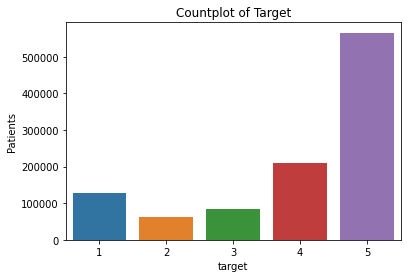

In [ ]:
sns.countplot(dfd['reviews.rating'])

# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

In [ ]:
X_train, y_test  = train_test_split(data1, test_size=0.3)

In [ ]:
y = dfd["reviews.rating"].values
x = dfd.drop(["reviews.rating"], axis = 1)

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

ValueError: ignored